In [5]:
from algorithms.apdrcd import apdrcd
from algorithms.sa_apdrcd import sa_apdrcd
from algorithms.pdrcd import pdrcd

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sys
import os

import ot
from ot.plot import plot1D_mat

### MNIST

In [ ]:
# from sklearn.datasets import fetch_openml
# digits = fetch_openml(name='mnist_784', version=1)
# data = digits.data.to_numpy()
# plt.imshow(data[0].reshape(28,28), cmap=plt.cm.gray_r)
# plt.show()

In [ ]:
# print(data.shape)
# N = data.shape[0]
# tmp = np.arange(N)
# np.random.seed(111)
# np.random.shuffle(tmp)
# i,j = tmp[0:2]

In [ ]:
# plt.subplot(1,2,1)
# plt.imshow(data[i].reshape(28,28), cmap=plt.cm.gray_r)
# plt.subplot(1,2,2)
# plt.imshow(data[j].reshape(28,28), cmap=plt.cm.gray_r)
# plt.show()

In [ ]:
# r = data[i]
# l = data[j]
# ns = r.shape[0]
# nt = l.shape[0]
# C = np.zeros((28,28))
# for i in range(28):
#     for j in range(28):
#         C[i][j] = np.abs(i-j)

#### Uniformly random numbers

In [ ]:
# ns = 100
# nt = 100

# np.random.seed(101)
# r = np.random.rand(ns)
# np.random.seed(102)
# l = np.random.rand(nt)
# r = r / np.sum(r)
# l = l / np.sum(l)
# np.random.seed(111)
# C = 10*np.random.rand(ns,nt)

### Gauss distribution

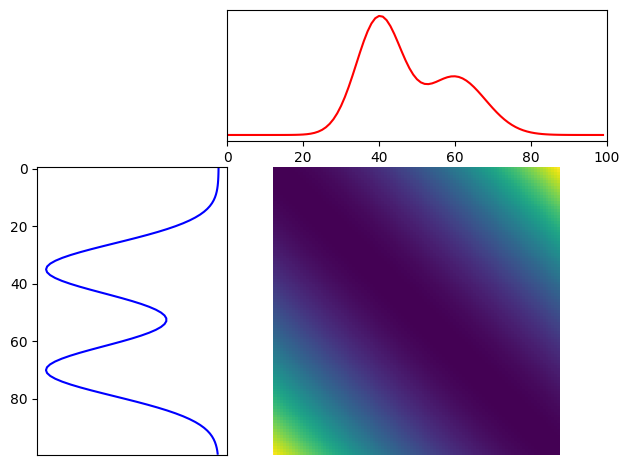

In [6]:
n = 100
ns = n
nt = n

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions for input
r = 0.5*ot.datasets.get_1D_gauss(n, m=70, sigma=9)+0.5*ot.datasets.get_1D_gauss(n, m=35, sigma=9)  # m= mean, s= std
l = 0.4*ot.datasets.get_1D_gauss(n, m=60, sigma=8)+0.6*ot.datasets.get_1D_gauss(n, m=40, sigma=6)

# loss matrix + normalization
C = ot.utils.dist0(n)
C /= C.max()

T = ot.sinkhorn(r, l, C, 1)

plot1D_mat(r,l,C)

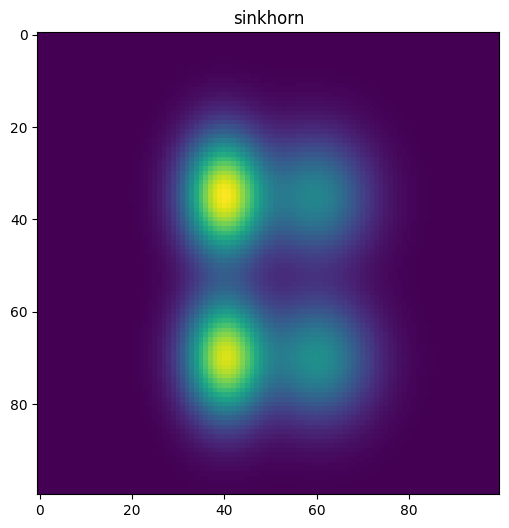

In [7]:
fig = plt.figure(figsize=(8,6))
plt.imshow(T)
plt.title("sinkhorn")
plt.show()

In [8]:
eta = 1
maxIter = 500

In [5]:
x1 = np.zeros(ns*nt)
x2 = np.zeros(ns*nt)
ii = np.arange(maxIter)
err1 = []
err2 = []
time1 = []
time2 = []
ot1 = []
ot2 = []

In [8]:
x1, err1, time1, ot1 = apdrcd(r, l, C, eta, maxIter, err_flag=1, time_flag=1, value_flag=1)

In [9]:
x2, err2, time2, ot2 = sa_apdrcd(r, l, C, eta, maxIter, err_flag=1, time_flag=1, value_flag=1)

### Error - Iteration

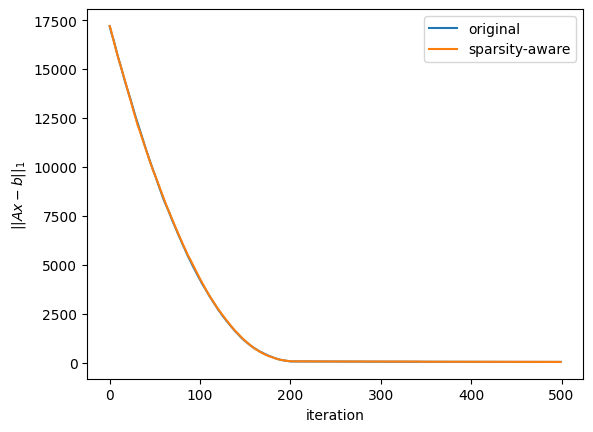

In [10]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(ii, err1, label="original")
ax.plot(ii, err2, label="sparsity-aware")
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("$||Ax-b||_1$")
plt.show()

### Time (s) - Iteration

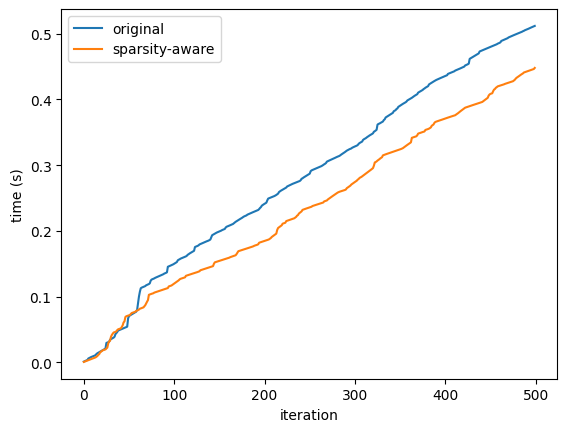

In [11]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(ii, time1, label="original")
ax.plot(ii, time2, label="sparsity-aware")
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("time (s)")
plt.show()

### OT-value - Iteration

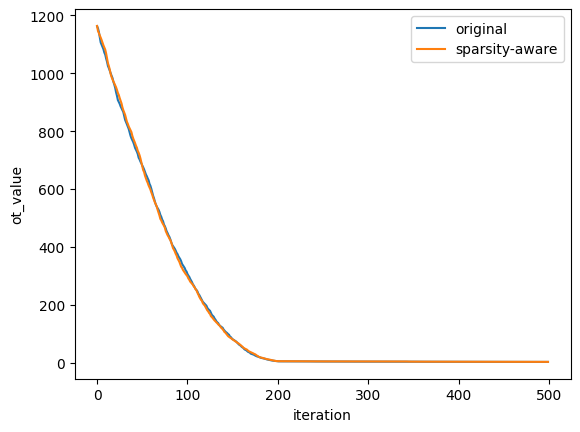

In [12]:
fig, ax = plt.subplots(facecolor="w")
ax.plot(ii, ot1, label="original")
ax.plot(ii, ot2, label="sparsity-aware")
ax.legend()
ax.set_xlabel("iteration")
ax.set_ylabel("ot_value")
plt.show()

### Transport Matrix

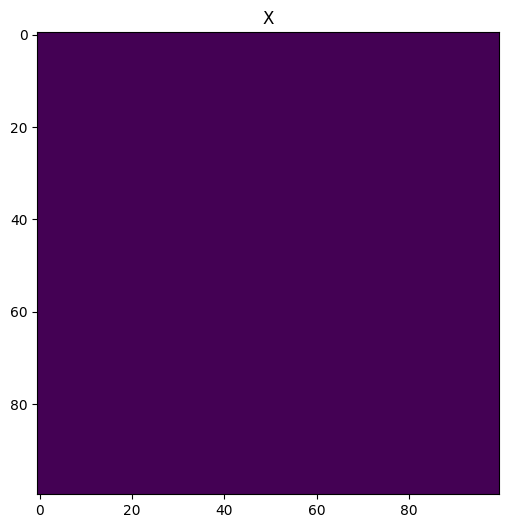

In [13]:
x1 = np.ones(ns*nt)
X = np.reshape(x1, [ns,nt])

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("X")
plt.show()

In [14]:
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [15]:
x1

array([1., 1., 1., ..., 1., 1., 1.])

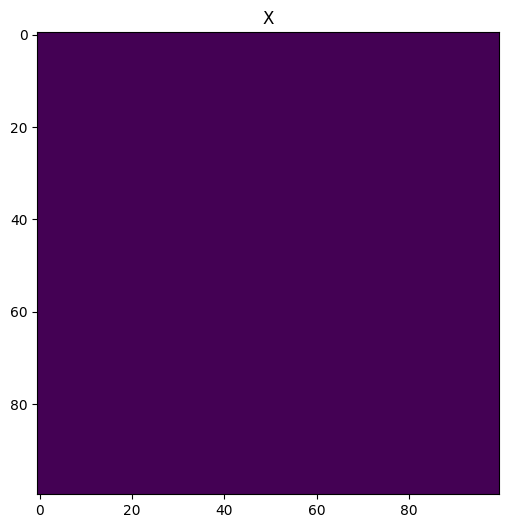

In [16]:
x2 = np.ones(ns*nt)
X = np.reshape(x1, [ns,nt])

fig = plt.figure(figsize=(8,6))
plt.imshow(X)
plt.title("X")
plt.show()

In [17]:
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [3]:
tmp = np.arange(100)
tmp1 = np.reshape(tmp, [10,10])

In [4]:
tmp1

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])